# Calculate CMIP Indeces

This file 
1. calculates all the indeces for all months for all cmip models.

    (a). use EC index for nino



In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.sstIndex as sst
import utils.pslIndex as psl
import utils.timePeriod as tp
import utils.compound as compound
import utils.ecIndex as ec
import utils.overlapBins as overlapBins


In [2]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
modelSet=_model.scenarioMip

In [5]:
experimentSet=_model.experimentSet

# 1. Calculate CMIP Indeces

For each experiment in historical, calculate indices

#The heavy lifting - you need the output from this to proceed

run ./cmipECIndeces.py

In [6]:
multipliers={'ACCESS-CM2':[1,1], 
    'ACCESS-ESM1-5':[1,1],
    'AWI-CM-1-1-MR':[-1,-1],
    'BCC-CSM2-MR':[-1,1],
    'CAMS-CSM1-0':[1,-1],
    'CAS-ESM2-0':[-1,1],
    'CESM2':[1,-1], 
    'CESM2-WACCM':[1,1],
    'CIESM':[-1,-1], 
    'CMCC-CM2-SR5':[-1,1],
    'CMCC-ESM2':[-1,1], 
    'CNRM-CM6-1':[-1,1], 
    'CNRM-ESM2-1':[-1,1], 
    'CanESM5':[1,1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[-1,1], 
    'EC-Earth3-CC':[1,1], 
    'EC-Earth3-Veg':[1,1],
    'EC-Earth3-Veg-LR':[1,1], 
    'FIO-ESM-2-0':[1,-1],
    'GFDL-CM4':[1,1], 
    'GFDL-ESM4':[-1,1], 
    'GISS-E2-1-G':[1,1],
    'HadGEM3-GC31-LL':[1,-1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,-1], 
    'INM-CM5-0':[-1,1],
    'IPSL-CM6A-LR':[-1,-1], 
    'MCM-UA-1-0':[1,-1], 
    'MIROC-ES2L':[1,1], 
    'MIROC6':[1,1],
    'MPI-ESM1-2-HR':[1,-1], 
    'MPI-ESM1-2-LR':[-1,1],
    'MRI-ESM2-0':[1,1], 
    'NESM3':[-1,-1],
    'NorESM2-LM':[1,1], 
    'NorESM2-MM':[-1,1], 
    'UKESM1-0-LL':[1,-1] 
    }

ACCESS-CM2
[1, 1]


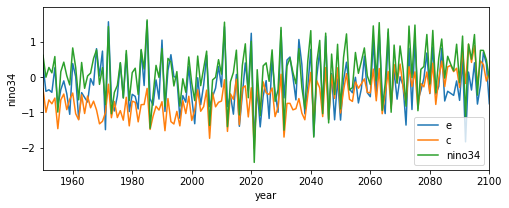

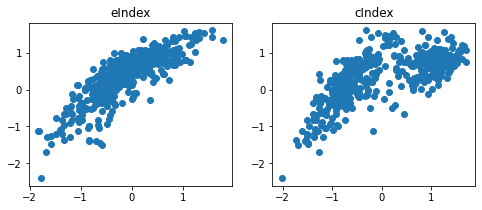

ACCESS-ESM1-5
[1, 1]


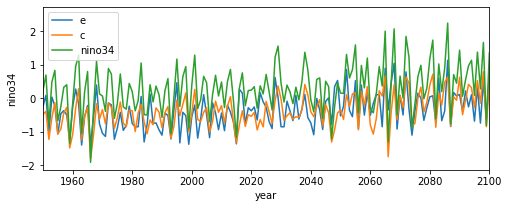

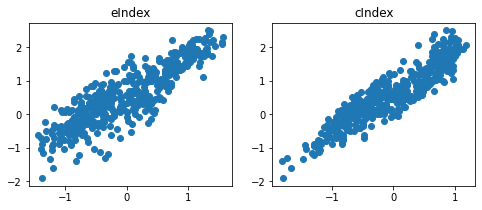

AWI-CM-1-1-MR
[-1, -1]


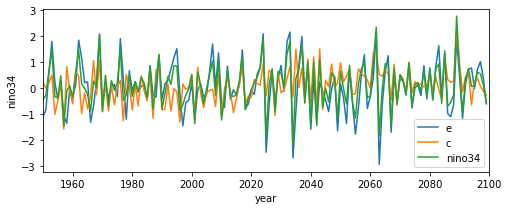

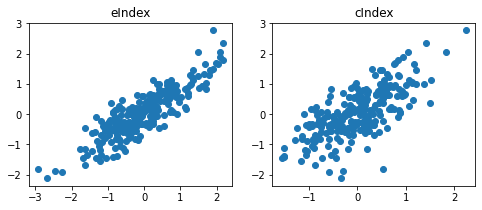

BCC-CSM2-MR
[-1, 1]


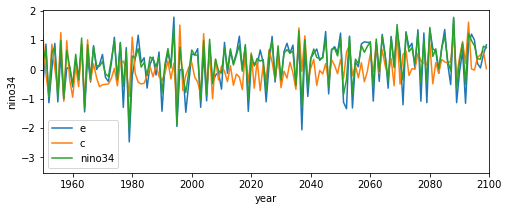

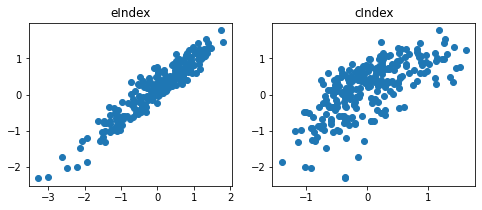

CAMS-CSM1-0
[1, -1]


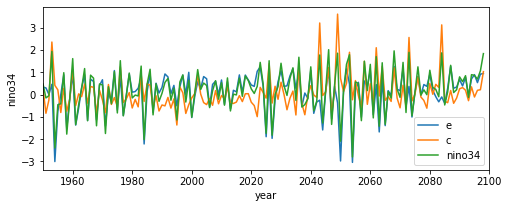

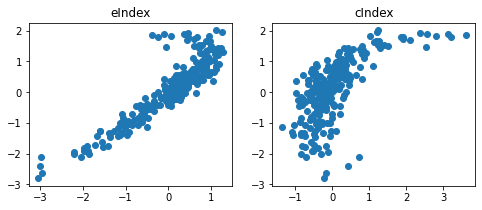

CAS-ESM2-0
[-1, 1]


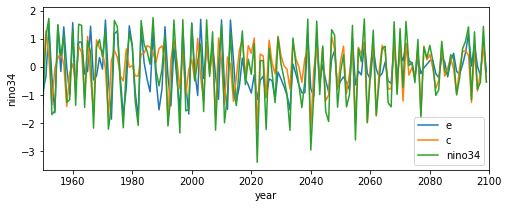

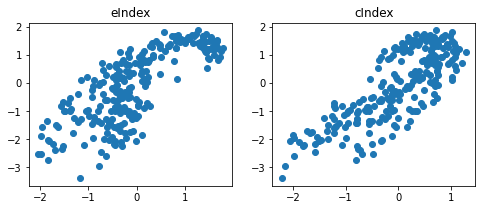

CESM2
[1, -1]


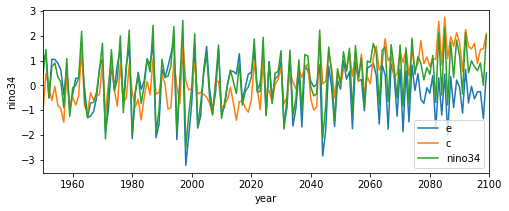

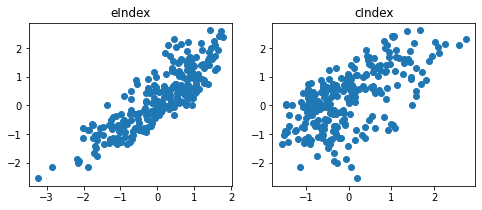

CESM2-WACCM
[1, 1]


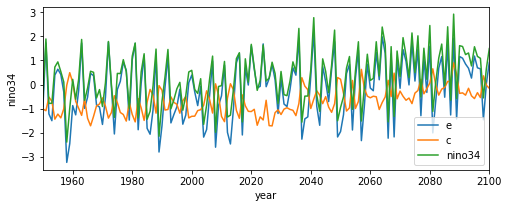

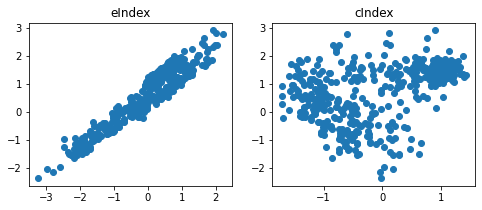

CIESM
[-1, -1]


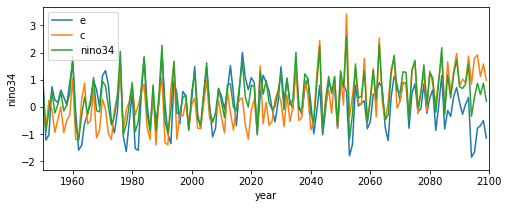

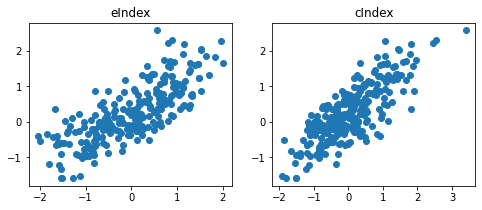

CMCC-CM2-SR5
[-1, 1]


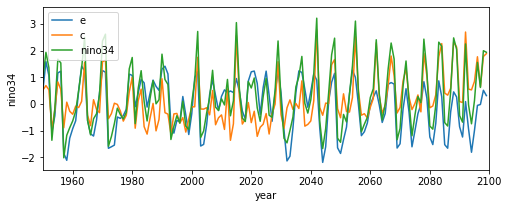

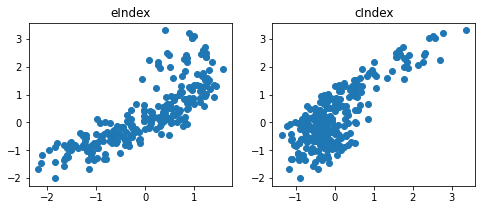

CMCC-ESM2
[-1, 1]


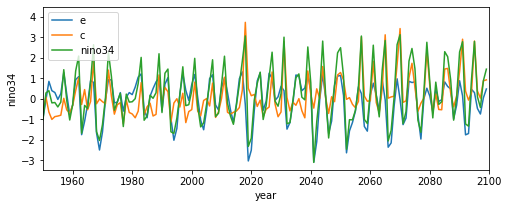

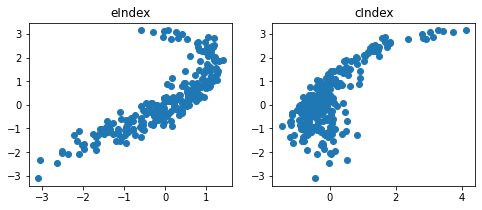

CNRM-CM6-1
[-1, 1]


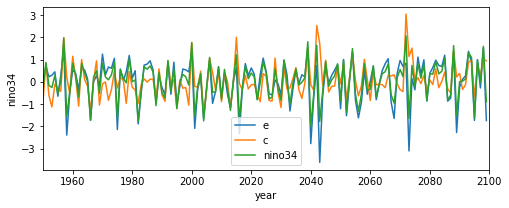

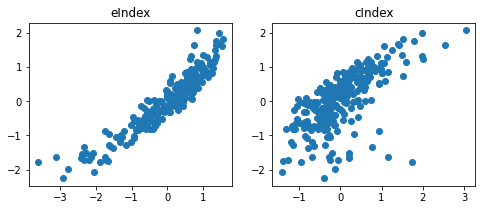

CNRM-ESM2-1
[-1, 1]


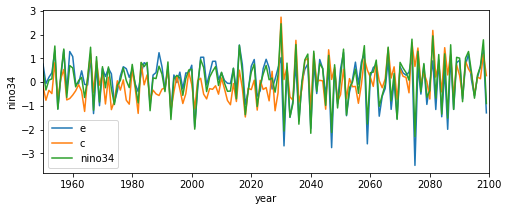

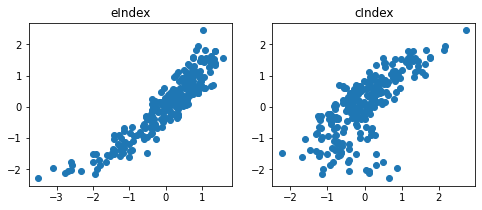

CanESM5
[1, 1]


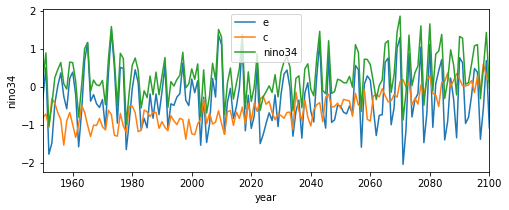

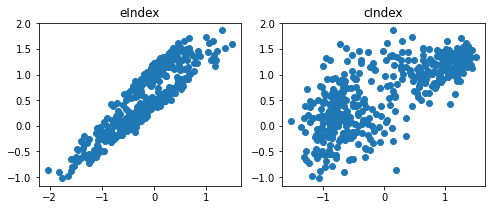

CanESM5-CanOE
[1, -1]


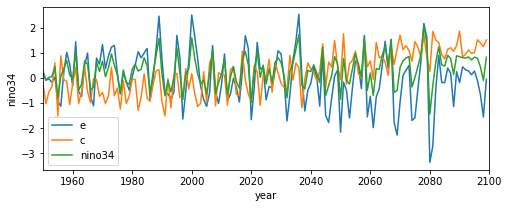

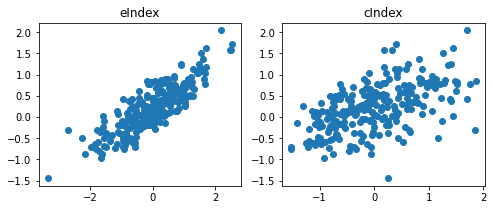

EC-Earth3
[-1, 1]


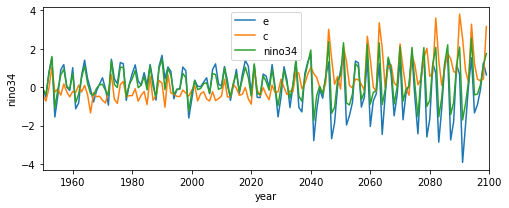

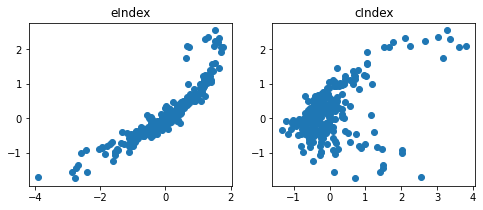

EC-Earth3-CC
[1, 1]


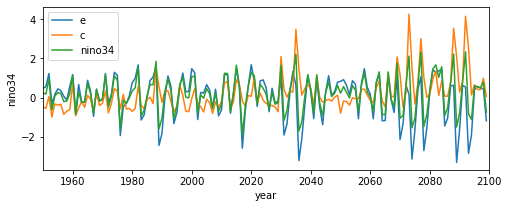

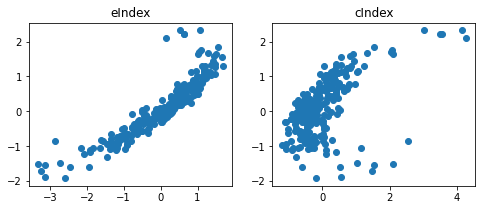

EC-Earth3-Veg
[1, 1]


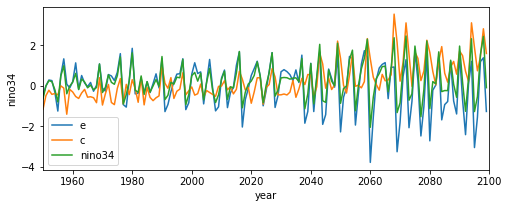

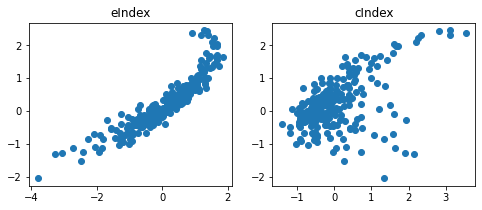

EC-Earth3-Veg-LR
[1, 1]


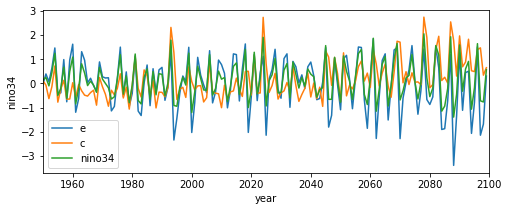

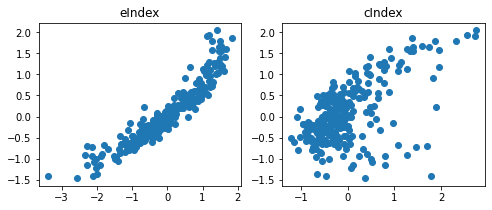

FIO-ESM-2-0
[1, -1]


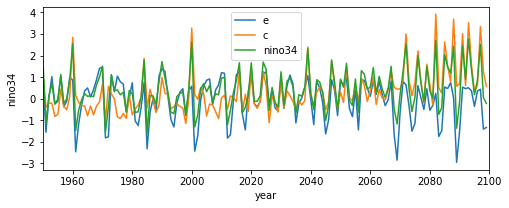

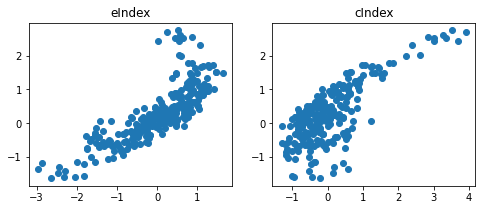

GFDL-CM4
[1, 1]


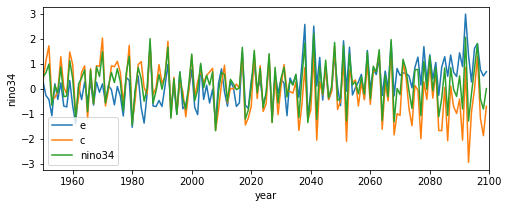

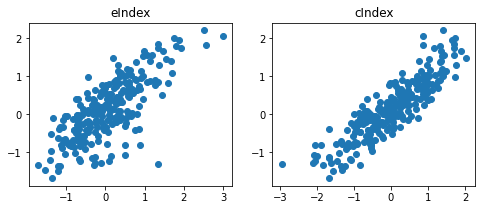

GFDL-ESM4
[-1, 1]


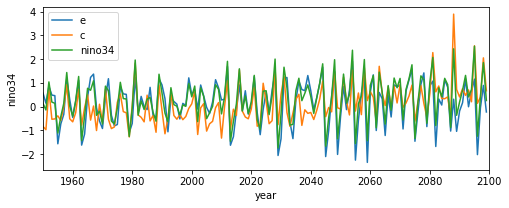

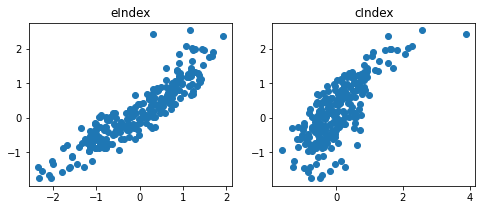

GISS-E2-1-G
[1, 1]


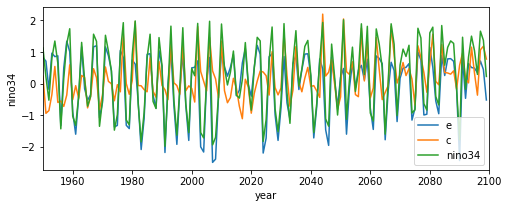

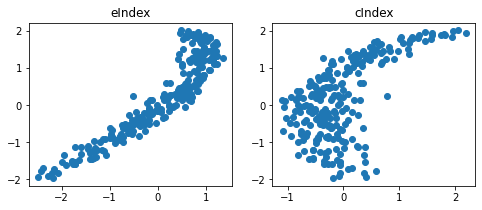

HadGEM3-GC31-LL
[1, -1]


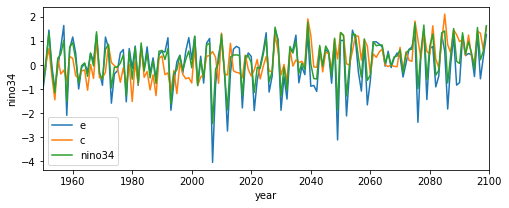

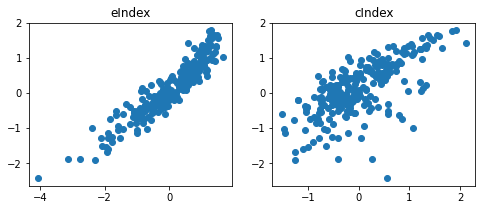

HadGEM3-GC31-MM
[1, 1]


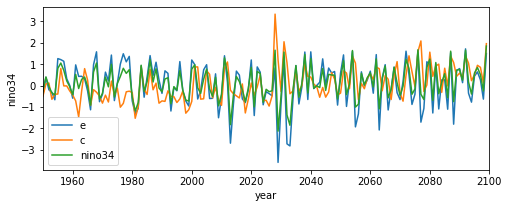

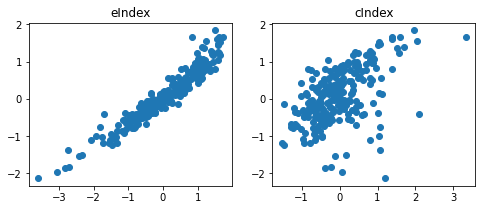

INM-CM4-8
[1, -1]


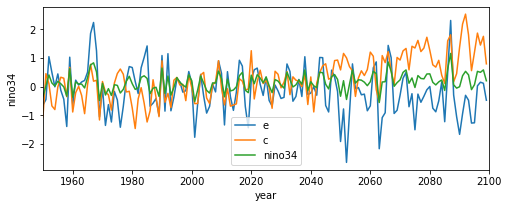

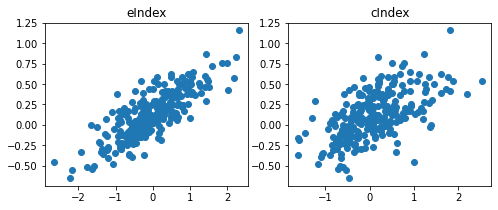

INM-CM5-0
[-1, 1]


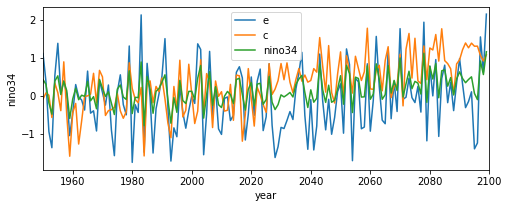

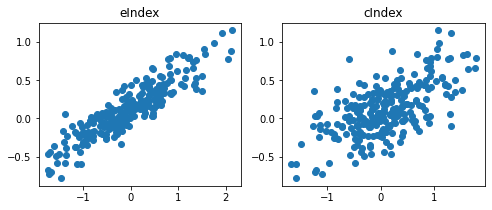

IPSL-CM6A-LR
[-1, -1]


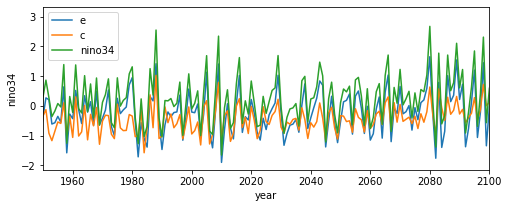

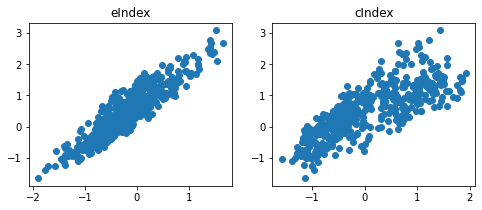

MCM-UA-1-0
[1, -1]


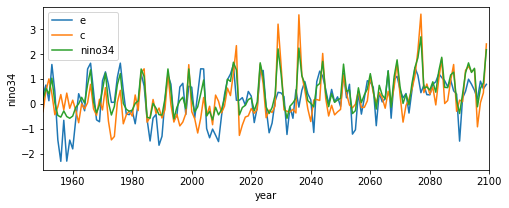

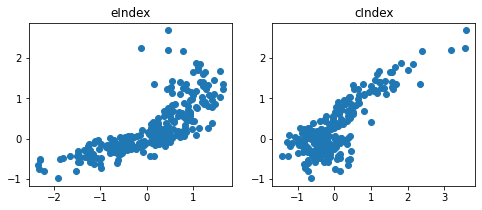

MIROC-ES2L
[1, 1]


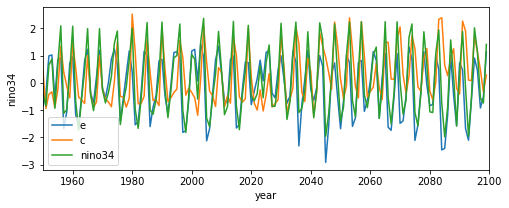

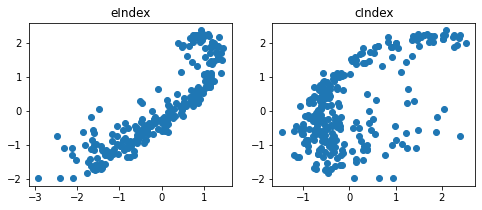

MIROC6
[1, 1]


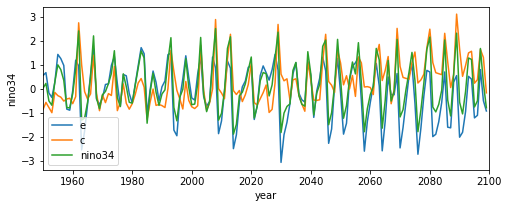

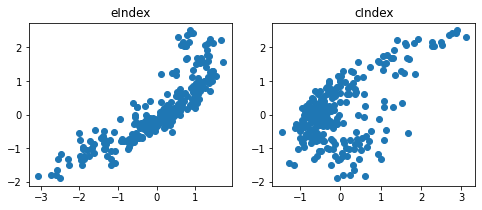

MPI-ESM1-2-HR
[1, -1]


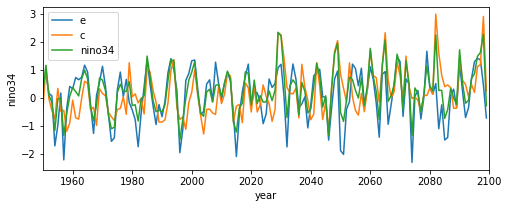

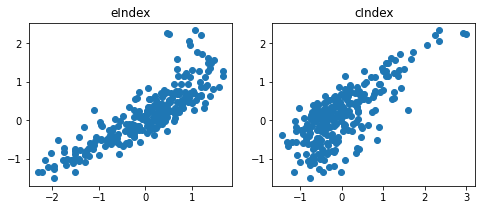

MPI-ESM1-2-LR
[-1, 1]


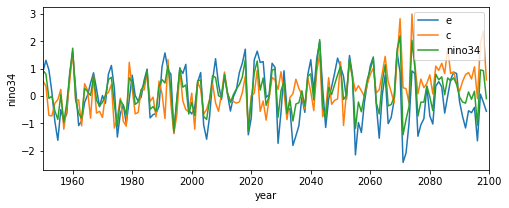

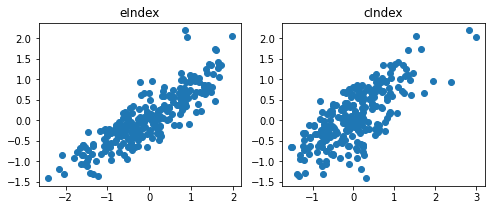

MRI-ESM2-0
[1, 1]


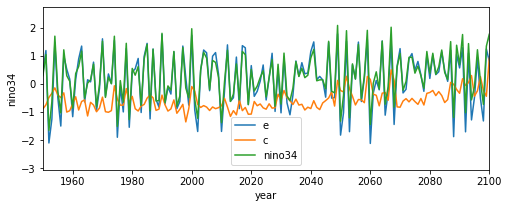

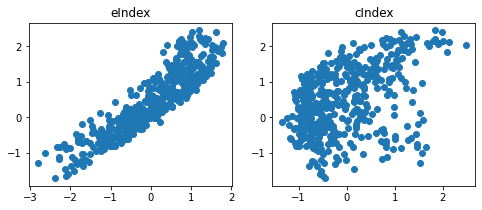

NESM3
[-1, -1]


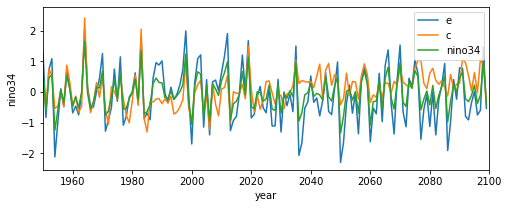

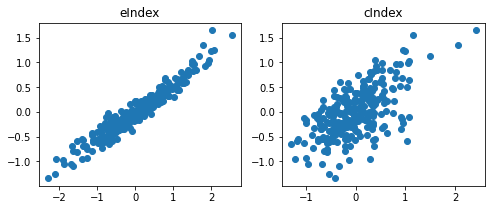

NorESM2-LM
[1, 1]


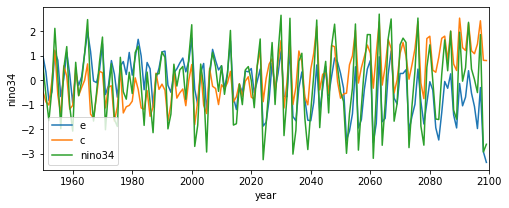

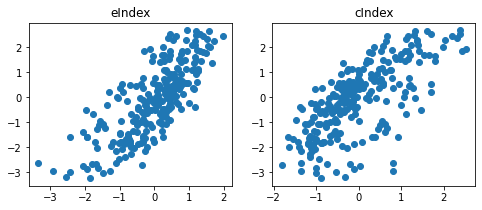

NorESM2-MM
[-1, 1]


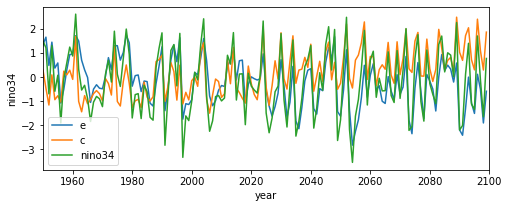

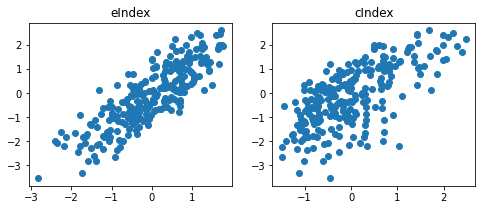

UKESM1-0-LL
[1, -1]


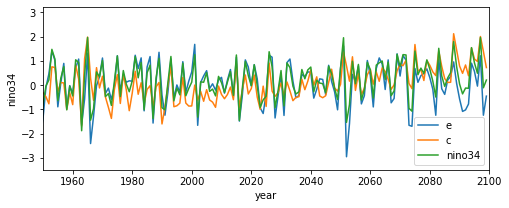

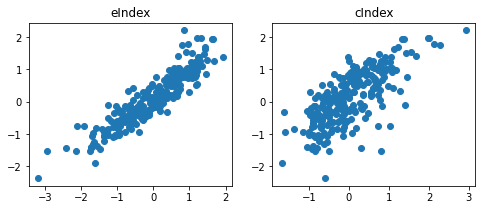

In [8]:
for iModel in _model.scenarioMip[:,1]:
    #try:
    
        print(iModel)
        
        multiplyBy=multipliers[iModel]
        
        print(multiplyBy)
        
        indexXr=xarray.Dataset()
        pcXr = xarray.open_dataset('results/cmipEcIndex/index' + iModel + '.nc')
        tradIndexXr = xarray.open_dataset('results/cmipWarmSeasonIndeces/'+iModel+'tosssp585.nc')
        
        
        indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['model']=iModel
          
        warmSeasXr=tp.averageForTimePeriod(indexXr)
            
        fig = plt.figure(figsize=(8,3))
        
        warmSeasXr.eIndex.plot()
        warmSeasXr.cIndex.plot()
        tradIndexXr.nino34.plot()
        
        plt.legend(['e','c','nino34'])
        plt.xlim([1950,2100])
        plt.show()
            
        fig = plt.figure(figsize=(8,3))

        plt.subplot(1,2,1)
        
        plt.scatter(warmSeasXr.eIndex, tradIndexXr.nino34)
        plt.title('eIndex')
        
        plt.subplot(1,2,2)
        plt.scatter(warmSeasXr.cIndex, tradIndexXr.nino34)
        plt.title('cIndex')

        plt.show()

    #except Exception as e:
    #    print('skipping' + model ) 
    


In [9]:
multipliersPiControl={'ACCESS-CM2':[-1,-1], 
    'ACCESS-ESM1-5':[1,1],
    'AWI-CM-1-1-MR':[-1,1],
    'BCC-CSM2-MR':[1,-1],
    'CAMS-CSM1-0':[-1,1],
    'CAS-ESM2-0':[1,1],
    'CESM2':[-1,-1], 
    'CESM2-WACCM':[-1,1],
    'CIESM':[-1,-1], 
    'CMCC-CM2-SR5':[1,1],
    'CMCC-ESM2':[-1,1], 
    'CNRM-CM6-1':[1,-1], 
    'CNRM-ESM2-1':[1,1], 
    'CanESM5':[-1,-1],
    'CanESM5-CanOE':[1,-1], 
    'EC-Earth3':[-1,1], 
    'EC-Earth3-CC':[-1,1], 
    'EC-Earth3-Veg':[-1,1],
    'EC-Earth3-Veg-LR':[-1,-1], 
    'FIO-ESM-2-0':[1,1],
    'GFDL-CM4':[-1,-1], 
    'GFDL-ESM4':[-1,1], 
    'GISS-E2-1-G':[-1,-1],
    'HadGEM3-GC31-LL':[1,1], 
    'HadGEM3-GC31-MM':[1,1], 
    'INM-CM4-8':[1,1], 
    'INM-CM5-0':[1,-1],
    'IPSL-CM6A-LR':[-1,-1], 
    'MCM-UA-1-0':[1,-1], 
    'MIROC-ES2L':[-1,1], 
    'MIROC6':[-1,-1],
    'MPI-ESM1-2-HR':[1,-1], 
    'MPI-ESM1-2-LR':[-1,1],
    'MRI-ESM2-0':[-1,1], 
    'NESM3':[-1,-1],
    'NorESM2-LM':[1,-1], 
    'NorESM2-MM':[-1,1], 
    'UKESM1-0-LL':[-1,1] 
    }

ACCESS-CM2
[-1, -1]


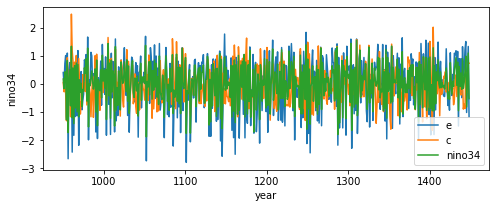

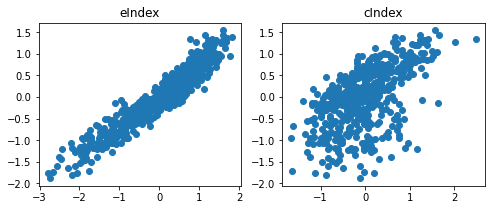

ACCESS-ESM1-5
[1, 1]


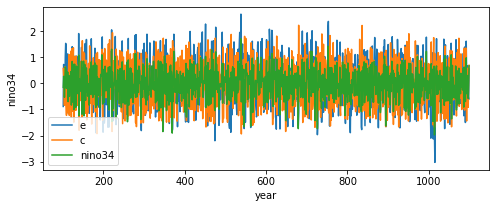

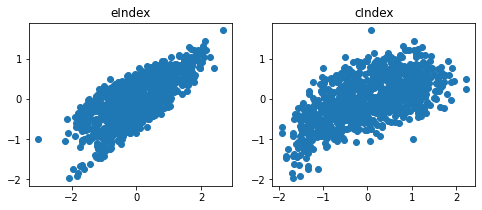

AWI-CM-1-1-MR
[-1, 1]


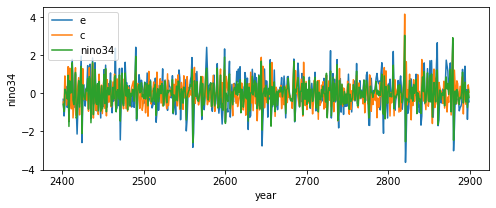

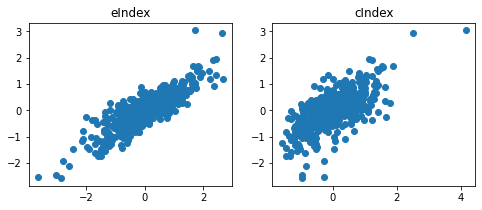

BCC-CSM2-MR
[1, -1]


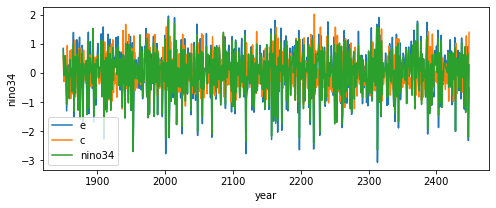

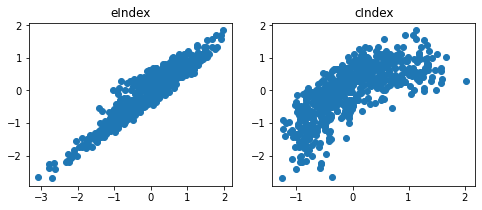

CAMS-CSM1-0
[-1, 1]


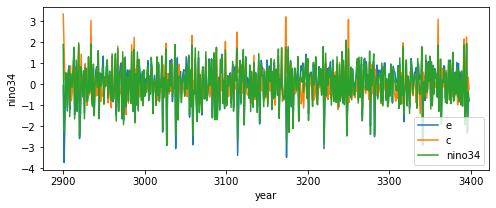

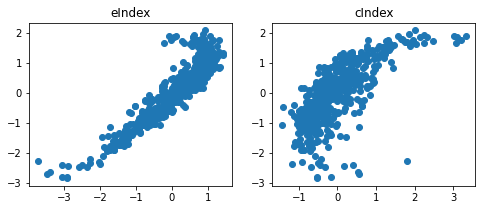

CAS-ESM2-0
[1, 1]


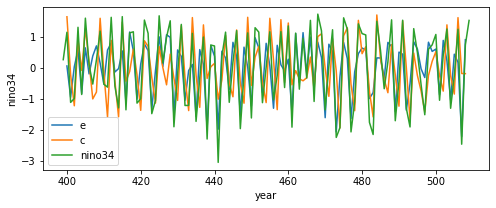

skippingCAS-ESM2-0
CESM2
[-1, -1]


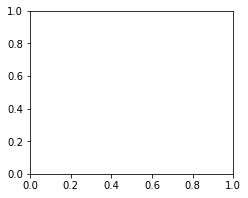

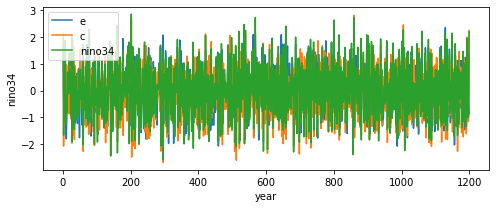

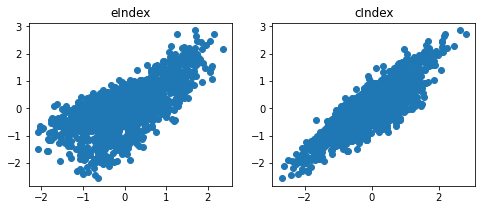

CESM2-WACCM
[-1, 1]
skippingCESM2-WACCM
CIESM
[-1, -1]


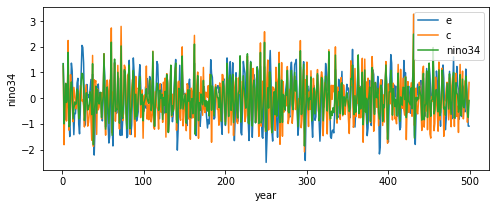

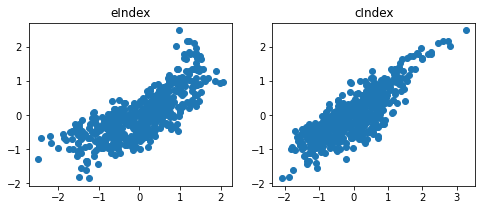

CMCC-CM2-SR5
[1, 1]


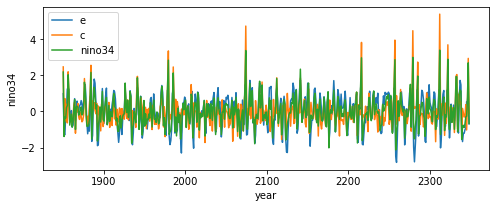

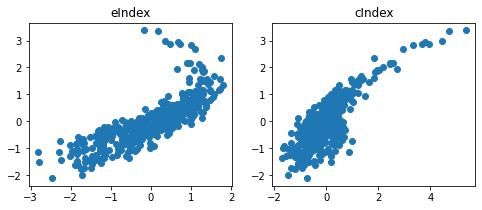

CMCC-ESM2
[-1, 1]


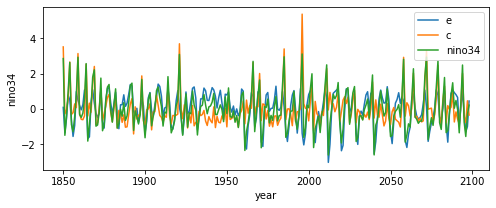

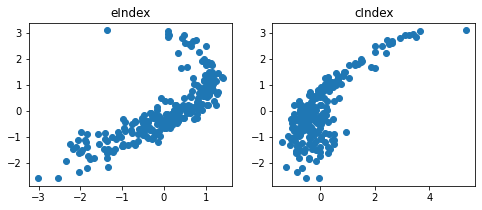

CNRM-CM6-1
[1, -1]


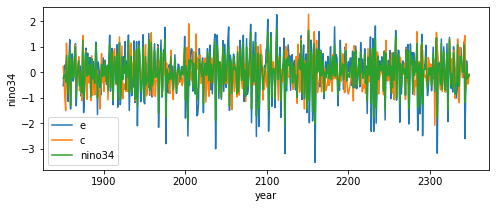

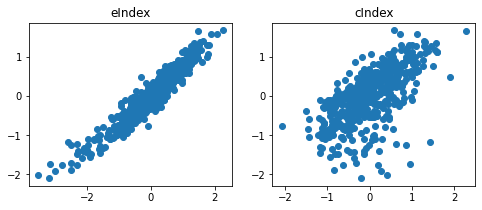

CNRM-ESM2-1
[1, 1]


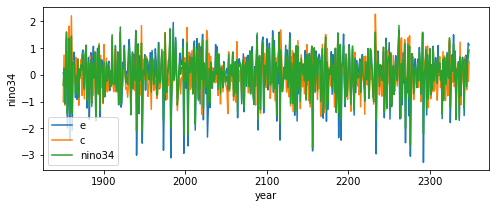

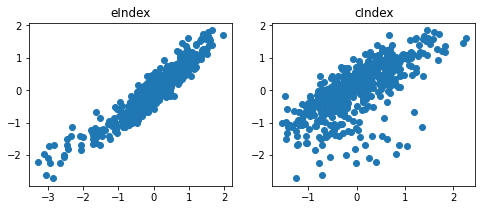

CanESM5
[-1, -1]


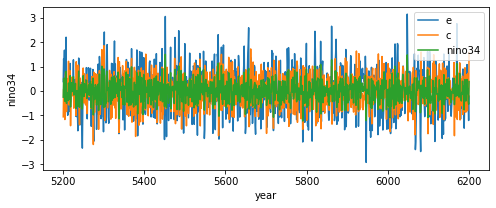

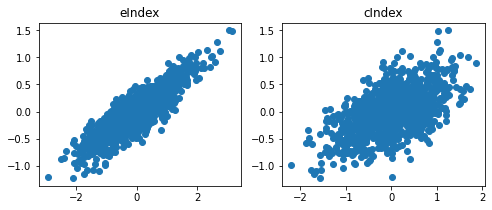

CanESM5-CanOE
[1, -1]


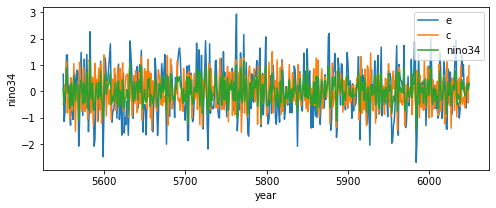

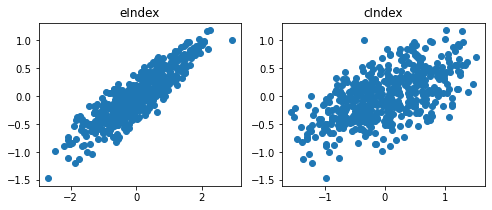

EC-Earth3
[-1, 1]


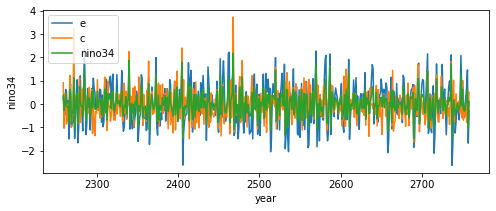

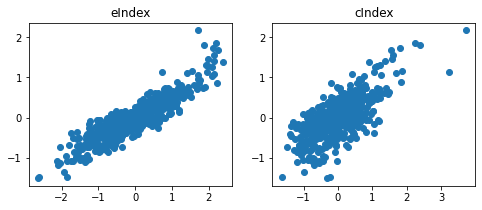

EC-Earth3-CC
[-1, 1]


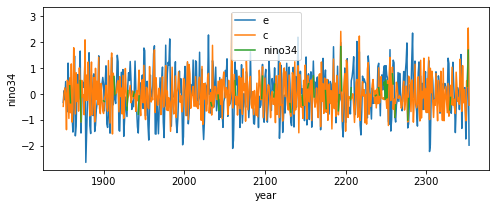

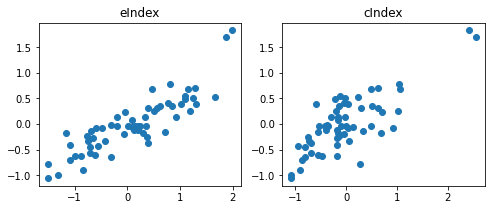

EC-Earth3-Veg
[-1, 1]


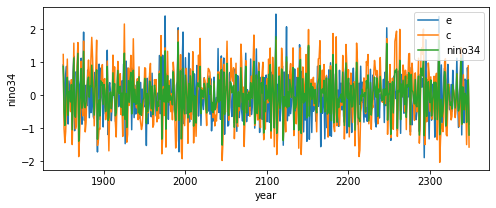

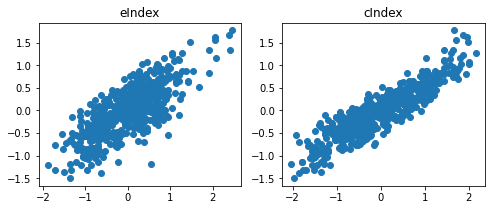

EC-Earth3-Veg-LR
[-1, -1]


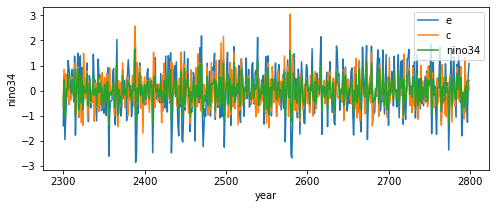

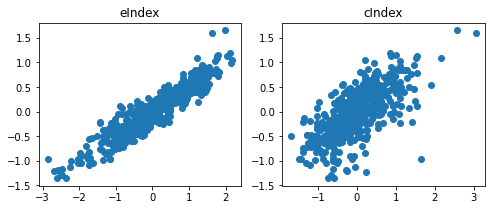

FIO-ESM-2-0
[1, 1]


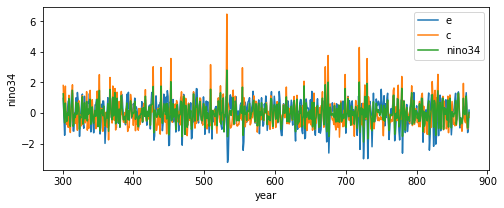

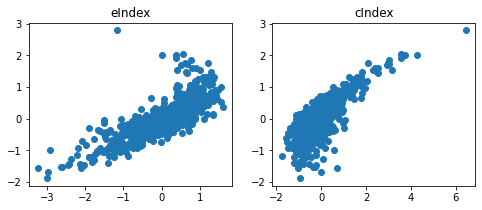

GFDL-CM4
[-1, -1]


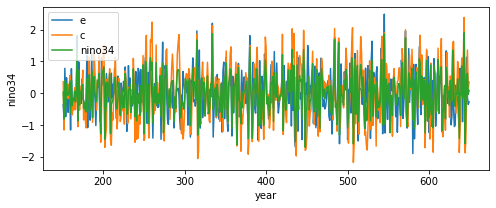

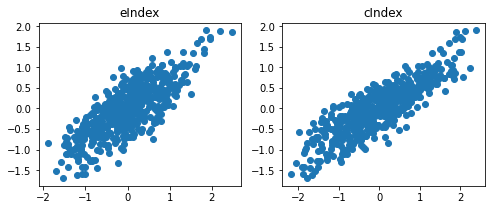

GFDL-ESM4
[-1, 1]


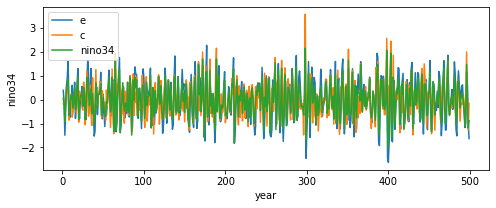

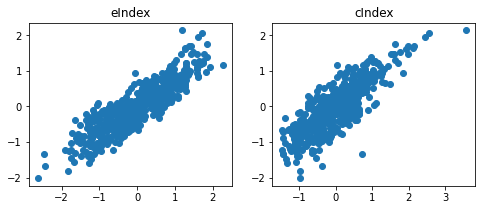

GISS-E2-1-G
[-1, -1]


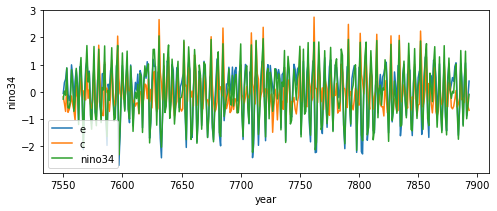

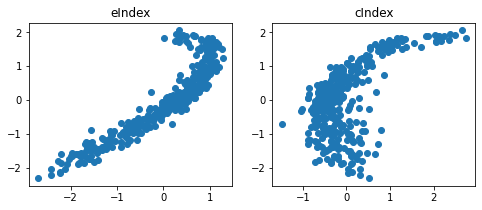

HadGEM3-GC31-LL
[1, 1]


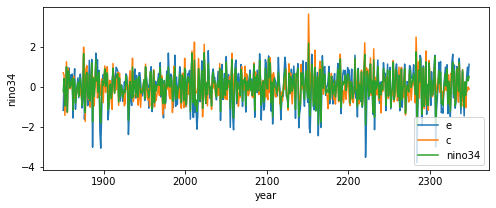

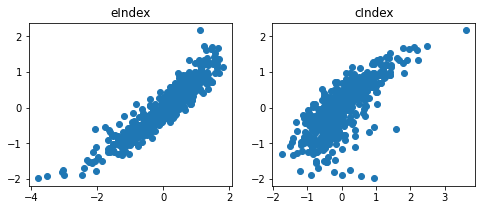

HadGEM3-GC31-MM
[1, 1]


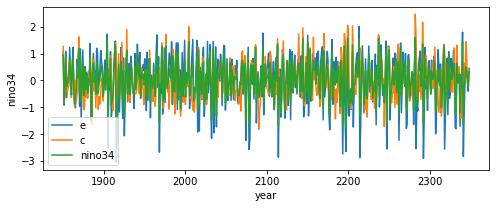

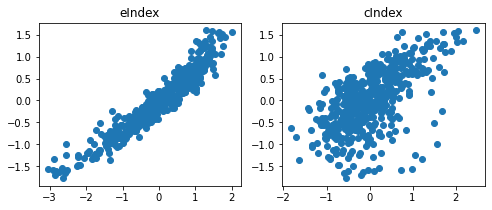

INM-CM4-8
[1, 1]


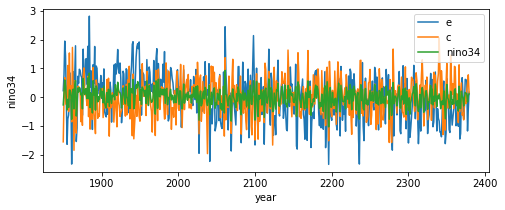

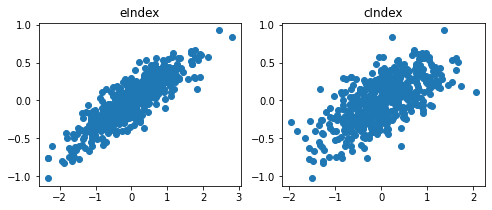

INM-CM5-0
[1, -1]


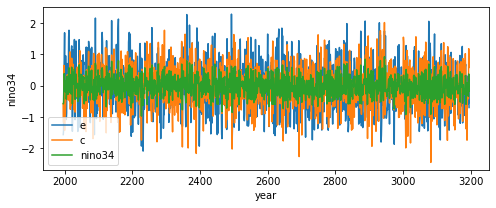

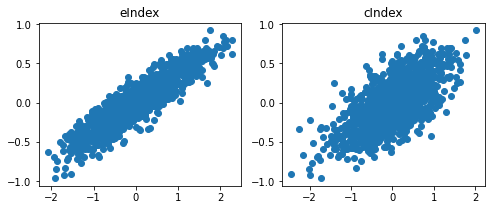

IPSL-CM6A-LR
[-1, -1]


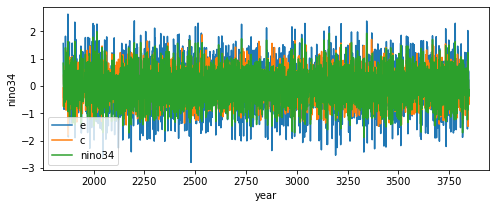

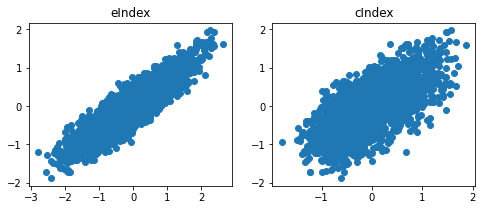

MCM-UA-1-0
[1, -1]


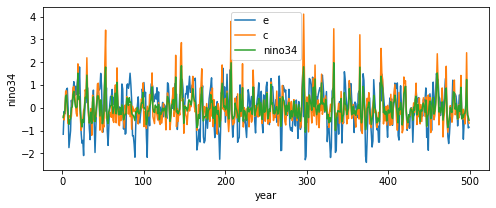

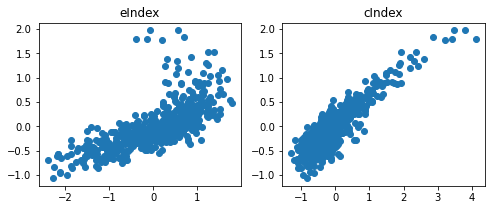

MIROC-ES2L
[-1, 1]


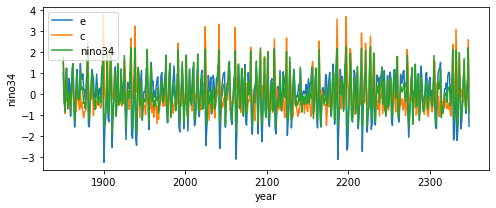

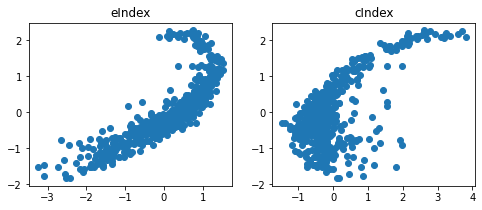

MIROC6
[-1, -1]


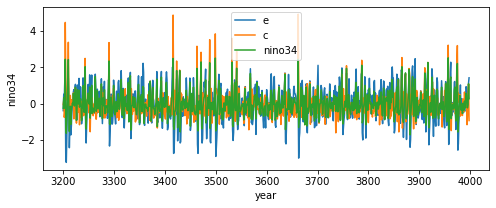

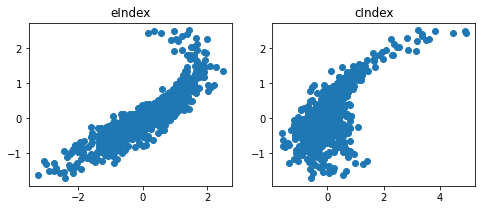

MPI-ESM1-2-HR
[1, -1]


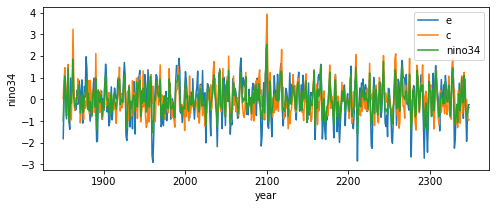

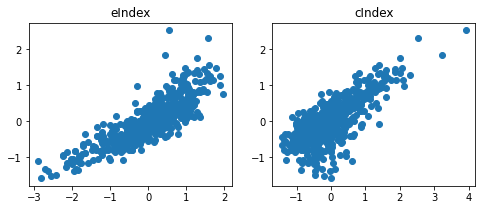

MPI-ESM1-2-LR
[-1, 1]


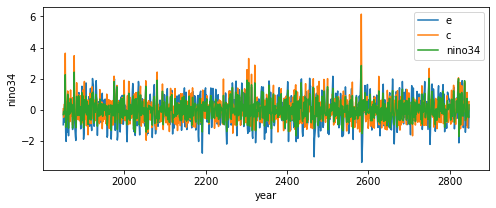

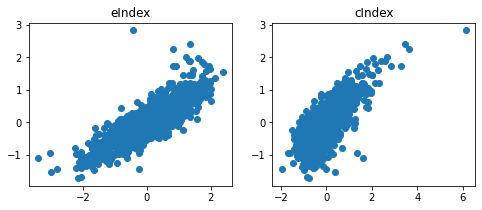

MRI-ESM2-0
[-1, 1]


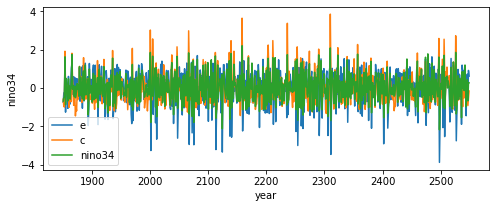

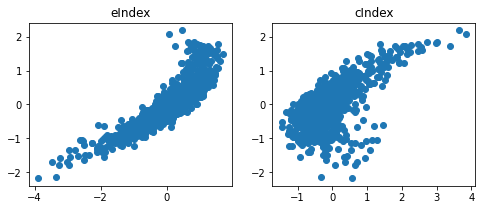

NESM3
[-1, -1]


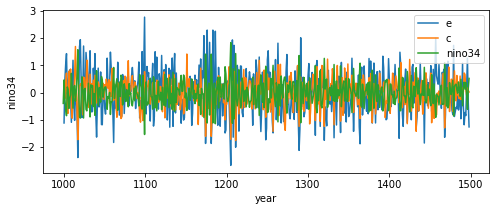

skippingNESM3
NorESM2-LM
[1, -1]


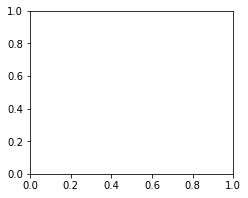

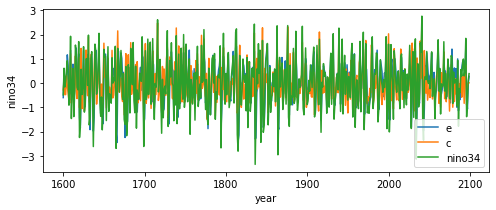

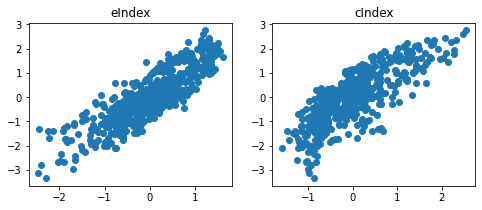

NorESM2-MM
[-1, 1]


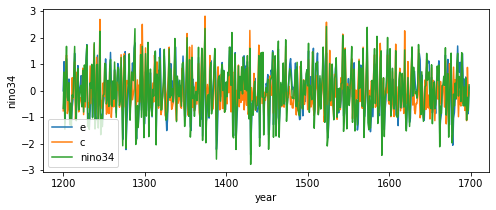

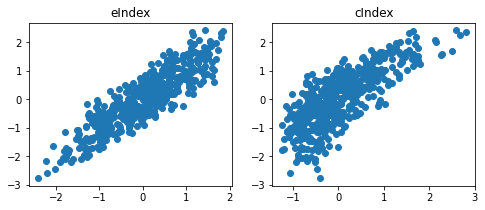

UKESM1-0-LL
[-1, 1]


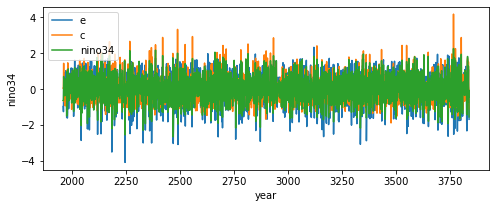

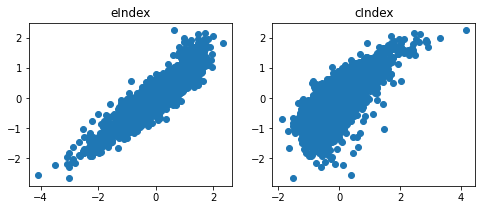

In [10]:
for iModel in _model.scenarioMip[:,1]:
    try:
    
        print(iModel)
        
        multiplyBy=multipliersPiControl[iModel]
        
        print(multiplyBy)
        
        indexXr=xarray.Dataset()
        pcXr = xarray.open_dataset('results/cmipEcIndex/indexPiControl' + iModel + '.nc')
        tradIndexXr = xarray.open_dataset('results/cmipWarmSeasonIndeces/'+iModel+'tospiControl.nc')
        
        
        indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
        indexXr['model']=iModel
          
        warmSeasXr=tp.averageForTimePeriod(indexXr)
            
        fig = plt.figure(figsize=(8,3))
        
        warmSeasXr.eIndex.plot()
        warmSeasXr.cIndex.plot()
        tradIndexXr.nino34.plot()
        
        plt.legend(['e','c','nino34'])
        plt.show()
            
        fig = plt.figure(figsize=(8,3))

        plt.subplot(1,2,1)
        
        plt.scatter(warmSeasXr.eIndex, tradIndexXr.nino34)
        plt.title('eIndex')
        
        plt.subplot(1,2,2)
        plt.scatter(warmSeasXr.cIndex, tradIndexXr.nino34)
        plt.title('cIndex')

        plt.show()

    except Exception as e:
        print('skipping' + iModel ) 
    


# Do a warm season av

This grabs the monthly e/c indeces, and calculates the averages for the time periods of interest (aka the warm season), as set in the _indexDefitionions file


The pcs for each month have already been calculated. So loading up the saved versions, and use the multipliers from above to calculate e and c index.

In [11]:
for experiment in ['piControl','ssp585']: 
    print(experiment)
    indexLs=list()
    warmSeasonLs=list()
    
    if experiment=='piControl':
        startPath='results/cmipEcIndex/indexPiControl'
        multipliExp=multipliersPiControl
    elif experiment=='ssp585':
        startPath='results/cmipEcIndex/index'
        multipliExp=multipliers

    for model in _model.scenarioMip[:,1]:
        try:
            multiplyBy=multipliExp[model]
            indexXr=xarray.Dataset()
            pcXr = xarray.open_dataset(startPath + model + '.nc')
            indexXr['eIndex']=(multiplyBy[0]*pcXr.pc1-multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
            indexXr['cIndex']=(multiplyBy[0]*pcXr.pc1+multiplyBy[1]*pcXr.pc2)/numpy.sqrt(2)
            indexXr['model']=iModel
            indexLs.append(indexXr)
            
            warmSeasXr=tp.averageForTimePeriod(indexXr)
            warmSeasXr['model']=model
            warmSeasonLs.append(warmSeasXr)
            
        except Exception as e:
            print('skipping' + model + experiment) 
    
    #save the monthly e and c index incase they are needed
    multiIndexXr=xarray.concat(indexLs, 'model')
    multiIndexXr.to_netcdf('results/cmip6'+experiment+'EcIndexMonth.nc')
    
    #save the warm season e and c index too
    results=xarray.concat(warmSeasonLs, 'model')
    results=results.assign_attrs({'experiment':experiment,**indexXr.attrs})
    results.to_netcdf('results/cmip6'+experiment+'EcIndex.nc')

piControl
ssp585


# Some sanity checks to see if it looks ok:


In [12]:
results=xarray.open_dataset('results/cmip6ssp585EcIndex.nc').sel(year=slice(1850,2099))

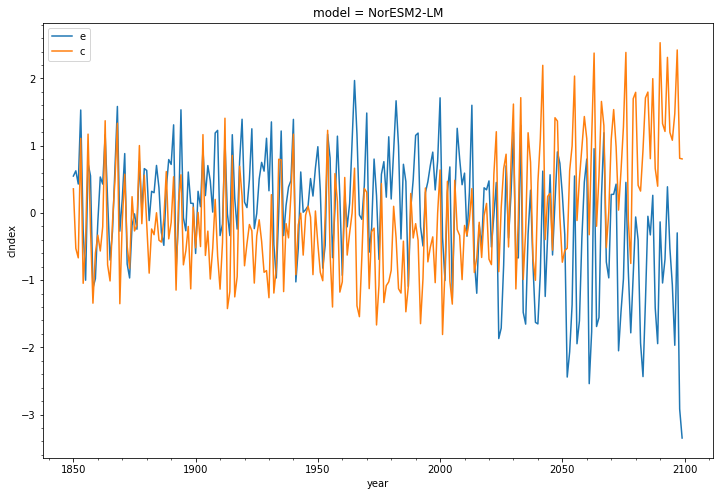

In [13]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

results.isel(model=35).eIndex.plot(label='e')
results.isel(model=35).cIndex.plot(label='c')

#Tidy up a bit
plt.minorticks_on()
plt.legend()

In [14]:
# A multi-model mean?

meanE = results.eIndex.mean(dim='model')
meanC = results.cIndex.mean(dim='model')

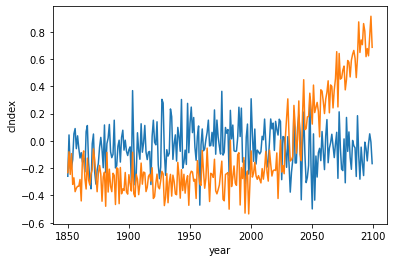

In [15]:
meanE.plot()
meanC.plot()

# 2. Calculate Compound Years for CESM6

# Find events in the e and c indeces

 1 sigma above/below mean
Using a piControl climatology

In [16]:
piControlEcXr=xarray.open_dataset('results/cmip6piControlEcIndex.nc')


# This should calculate stds for all experiments and all indeces
stdEcXr = piControlEcXr.std(dim='year')
stdEcXr

<xarray.Dataset>
Dimensions:  (model: 38)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    cIndex   (model) float64 0.6701 0.885 0.7056 0.6591 ... 0.8023 0.7601 0.733
    eIndex   (model) float64 0.987 0.9098 0.9154 0.8965 ... 0.84 0.864 0.9206

In [17]:
#merge the experiments into one XR for convenience
ecIndexXr=xarray.concat([
    xarray.open_dataset('results/cmip6'+experiment+'EcIndex.nc') for experiment in ['piControl','ssp585']], 
'experiment')

ecIndexXr['experiment']=['piControl','ssp585']

In [18]:
ecIndexXr

<xarray.Dataset>
Dimensions:     (experiment: 2, model: 38, year: 5341)
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * experiment  (experiment) <U9 'piControl' 'ssp585'
Data variables:
    cIndex      (experiment, model, year) float64 nan nan nan ... nan nan nan
    eIndex      (experiment, model, year) float64 nan nan nan ... nan nan nan
Attributes:
    experiment:  piControl

Apply the 1 sigma criteria

In [19]:
firePosEc, fireNegEc = compound.applyCriteria(ecIndexXr, stdEcXr)

firePos: 
['cIndex', 'eIndex']
fireNeg: 
[]


In [20]:
#find where either index is saying there is an event
# this is a bit messy, you need to make sure Nan years stay as Nan (years for the piControl is different for all the models)

firePosEc['ecCombined']=(((firePosEc.cIndex+firePosEc.eIndex)>0)*1).where(firePosEc.cIndex.isnull()==False)
fireNegEc['ecCombined']=(((fireNegEc.cIndex+fireNegEc.eIndex)>0)*1).where(fireNegEc.cIndex.isnull()==False)


In [21]:
firePosEc.sel(experiment='piControl',model='CESM2')

<xarray.Dataset>
Dimensions:     (year: 5341)
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
    model       <U5 'CESM2'
    experiment  <U9 'piControl'
Data variables:
    cIndex      (year) float64 1.0 0.0 0.0 1.0 0.0 0.0 ... nan nan nan nan nan
    eIndex      (year) float64 1.0 0.0 0.0 1.0 1.0 0.0 ... nan nan nan nan nan
    ecCombined  (year) float64 1.0 0.0 0.0 1.0 1.0 0.0 ... nan nan nan nan nan

In [22]:
#Find events in the trad indeces

In [23]:
tradIndecesXr = xarray.concat([
    xarray.open_dataset('results/cmip6'+experiment+'TradIndecesTos.nc') for experiment in ['piControl','ssp585']], 
'experiment')

tradIndecesXr['experiment']=['piControl','ssp585']



In [24]:
piControlXr=xarray.open_dataset('results/cmip6piControlTradIndecesTos.nc')

piControlXr.model.values

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CESM2-WACCM', 'CIESM',
       'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
       'CanESM5', 'CanESM5-CanOE', 'EC-Earth3', 'EC-Earth3-CC',
       'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FIO-ESM-2-0', 'GFDL-CM4',
       'GFDL-ESM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MCM-UA-1-0',
       'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
       'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype=object)

In [25]:
# This should calculate stds for all experiments and all indeces
stdXr = piControlXr.std(dim='year')

# define some criteria that we want to use to identifiy it thats an event
criteriaXr= xarray.merge(
    (stdXr['nino34'], stdXr['nino4'], stdXr['dmi'], stdXr['eastIO'],  stdXr['sam']/2)
)

In [26]:
firePosTrad, fireNegTrad = compound.applyCriteria(tradIndecesXr, criteriaXr)


firePos: 
['nino4', 'nino34', 'dmi']
fireNeg: 
['sam', 'eastIO']


Now we can merge the events from each method

In [27]:
firePos=xarray.merge([firePosEc,firePosTrad])
fireNeg=xarray.merge([fireNegEc,fireNegTrad])

In [28]:
firePos

<xarray.Dataset>
Dimensions:     (experiment: 2, model: 38, year: 5341)
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * experiment  (experiment) <U9 'piControl' 'ssp585'
Data variables:
    cIndex      (experiment, model, year) float64 nan nan nan ... nan nan nan
    eIndex      (experiment, model, year) float64 nan nan nan ... nan nan nan
    ecCombined  (experiment, model, year) float64 nan nan nan ... nan nan nan
    nino4       (experiment, model, year) float64 nan nan nan ... nan nan nan
    nino34      (experiment, model, year) float64 nan nan nan ... nan nan nan
    dmi         (experiment, model, year) float64 nan nan nan ... nan nan nan
    sam         (experiment, model, year) float64 nan nan nan ... nan nan nan
    eastIO      (experiment, model, year) float64 nan nan nan ... nan nan nan

In [29]:
firePosBinnedXr=overlapBins.binSum(firePos.sel(experiment='ssp585', year=slice(1850,2100),drop=True))

In [30]:
firePosBinnedXr

<xarray.Dataset>
Dimensions:     (model: 38, year: 23)
Coordinates:
  * model       (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * year        (year) int64 1865 1875 1885 1895 1905 ... 2055 2065 2075 2085
Data variables:
    cIndex      (year, model) float64 0.0 0.0 3.0 4.0 ... 12.0 22.0 15.0 17.0
    eIndex      (year, model) float64 0.0 0.0 3.0 4.0 2.0 ... 4.0 0.0 1.0 5.0
    ecCombined  (year, model) float64 0.0 0.0 6.0 8.0 ... 13.0 22.0 15.0 17.0
    nino4       (year, model) float64 5.0 2.0 5.0 6.0 4.0 ... 7.0 12.0 10.0 13.0
    nino34      (year, model) float64 6.0 2.0 4.0 4.0 4.0 ... 6.0 10.0 9.0 11.0
    dmi         (year, model) float64 7.0 2.0 4.0 5.0 6.0 ... 5.0 18.0 21.0 22.0
    sam         (year, model) float64 14.0 6.0 11.0 10.0 ... 0.0 0.0 0.0 0.0
    eastIO      (year, model) float64 7.0 4.0 4.0 4.0 6.0 ... 2.0 19.0 20.0 22.0
Attributes:
    Bins:     Overlapping 30 year bins, seperating by 10 year intervals
    Year:     Midpoint of bin

In [37]:
binSumLs = list()

#using bin sum is a bit funky because the models have different start and end years
#run binSum for each model seperately, after filtering the nans
for iModel in piControlXr.model.values:
    try:
        print(iModel)

        piCModelXr=firePos.sel(experiment='piControl', drop=True).sel(model=iModel)
        
        binSumXr=overlapBins.binSum(piCModelXr.where(piCModelXr.isnull()==False, drop=True))
        
        binSumLs.append(binSumXr)
        
    except Exception as e:
        print(e)
        
piControlBinnedXr = xarray.concat(binSumLs, 'model')

ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
BCC-CSM2-MR
CAMS-CSM1-0
CAS-ESM2-0
CESM2
CESM2-WACCM
CIESM
CMCC-CM2-SR5
CMCC-ESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
CanESM5-CanOE
EC-Earth3
EC-Earth3-CC
EC-Earth3-Veg
EC-Earth3-Veg-LR
FIO-ESM-2-0
GFDL-CM4
GFDL-ESM4
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-MM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MCM-UA-1-0
MIROC-ES2L
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NESM3
NorESM2-LM
NorESM2-MM
UKESM1-0-LL


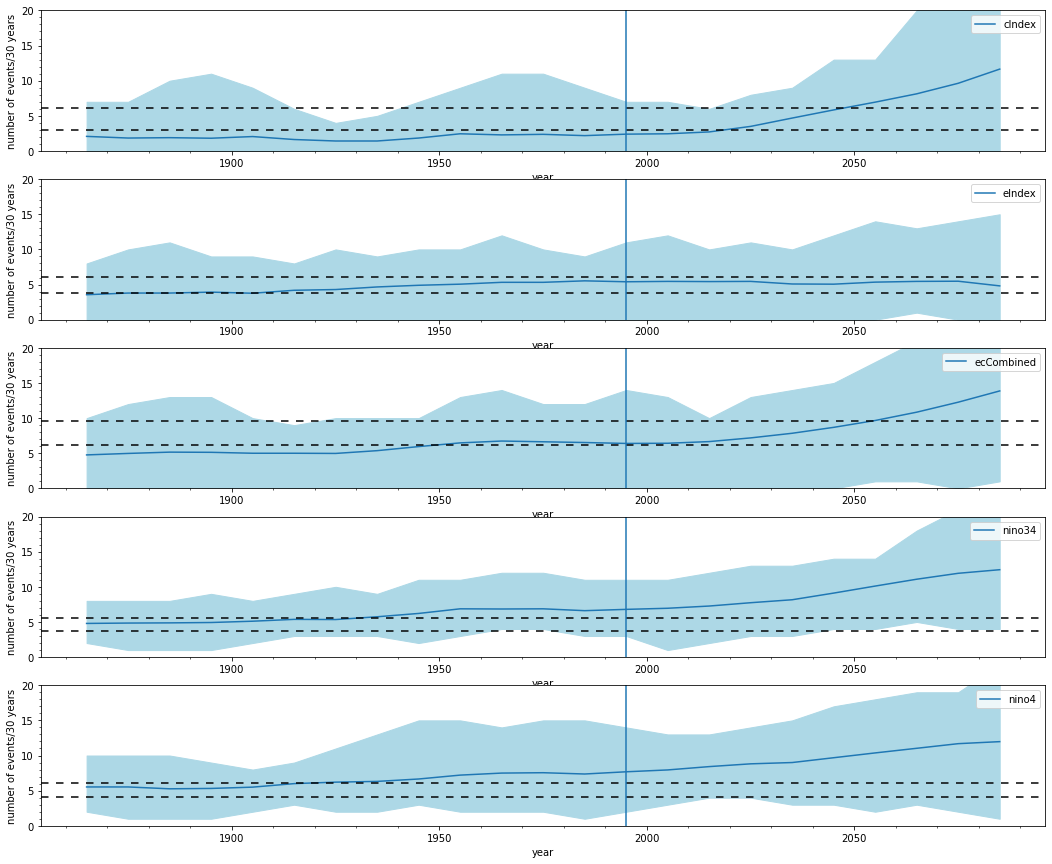

In [38]:
%run utils/emergence.ipynb

emergePlot(firePosBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']],
piControlBinnedXr[['cIndex','eIndex','ecCombined','nino34','nino4']]
          )

# Calculate the compounding years and plot an example

In [39]:
allCompoundsXr=xarray.concat([
    compound.compound(firePos),
    compound.compound(fireNeg)],
    'fire')

allCompoundsXr['fire']=['pos','neg']

allCompoundsXr.to_netcdf('results/cmip6EcCompounds.nc')

ecCombinedDmiSam
ecCombinedEastioSam
cIndexDmiSam
cIndexEastioSam
eIndexDmiSam
eIndexEastioSam
nino4DmiSam
nino4EastioSam
nino34DmiSam
nino34EastioSam
ecCombinedDmiSam
ecCombinedEastioSam
cIndexDmiSam
cIndexEastioSam
eIndexDmiSam
eIndexEastioSam
nino4DmiSam
nino4EastioSam
nino34DmiSam
nino34EastioSam


In [40]:
allCompoundsXr.eIndexDmiSam.sel(model='CIESM')

<xarray.DataArray 'eIndexDmiSam' (fire: 2, compound: 9, experiment: 2, year: 5341)>
array([[[[ 3.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 1.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 1.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[ 0.,  1.,  2., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  1.,  0., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  1., ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * year        (year) int64 1 2 3 4 5 6 7 ... 7888 7889 7890 7891 7892 7893
    model       <U5 'CIESM'
  * experiment  (experiment) <U9 'piControl' 'ssp585'
  * compound    (compound) <U11 'nEvents' 'all3' ... 'sam' 'anyCompound'
  * fire        (fire) <U3 'pos' 'neg'

Text(0.5, 1.0, 'CIESM: Pairs and all-three compounds for individal years')

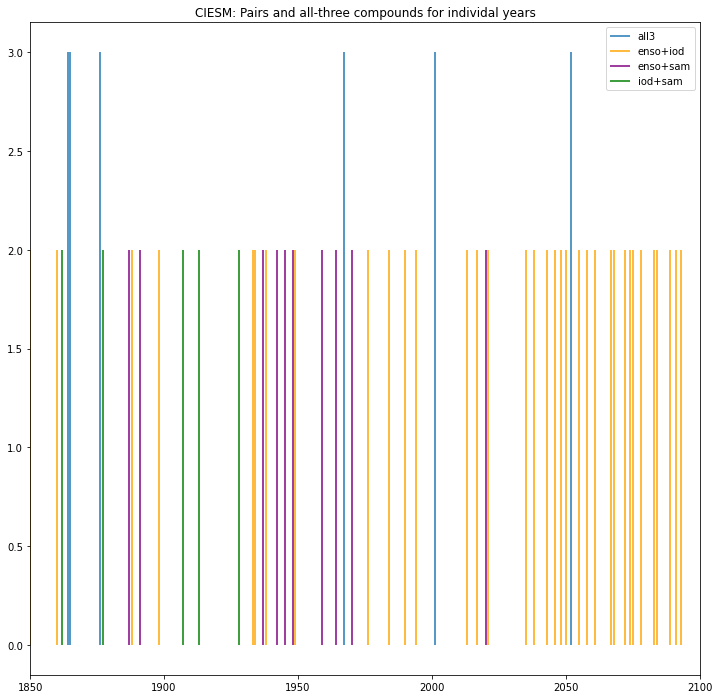

In [41]:
firePosCompound=allCompoundsXr.ecCombinedDmiSam.to_dataset('compound').sel(model='CIESM', experiment='ssp585', fire='pos', drop=True)

toPlot=3*firePosCompound.all3

plt.figure(figsize=(12,12))

plt.vlines(
    x=firePosCompound.year, 
    ymin=0,
    ymax=toPlot,
    label='all3'
)

colors=['orange', 'purple', 'green']
iCol = 0

for iPair in allCompoundsXr.attrs['pairs']:
    plt.vlines(
        x=firePosCompound.year, 
        ymin=0,
        ymax=2*firePosCompound[iPair],
        color=colors[iCol],
        label=iPair
    )
    iCol+=1
plt.legend()
plt.xlim(1850,2100)
plt.title('CIESM'+': Pairs and all-three compounds for individal years')